# Data Collection
Historical NVIDIA stock data is collected from an open financial data source.
The dataset  contains daily trading information including Date, Open, High, Low,
Close prices, and Trading Volume, which form the foundation of this time-series analysis.



In [73]:
# Import necessary libraries
import yfinance as yf

# Define ticker and date range
ticker = "NVDA"
start_date = "2015-01-01"
end_date = "2024-12-31"

In [74]:
# Download historical stock data
# We use the yfinance  API to scrape open market data from Yahoo Finance.
# This satisfies the requirement of using open data sources.
nvda_data = yf.download(ticker, start=start_date, end=end_date)

# Save original raw data as per requirements
nvda_data.to_csv("nvda_stock_data_raw.csv")
print("Raw dataset saved to nvda_stock_data_raw.csv")

# Show first 5 rows
nvda_data.head()

# Reset index to make Date a column
nvda_data.reset_index(inplace=True)

# Flatten MultiIndex columns created by yfinance
nvda_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) and col[1] else col[0] for col in nvda_data.columns.values]

nvda_data.head()

# Sort data by date
nvda_data = nvda_data.sort_values(by='Date')

nvda_data.head()

[*********************100%***********************]  1 of 1 completed

Raw dataset saved to nvda_stock_data_raw.csv


,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
0,2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000
1,2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000
2,2015-01-06,0.460456,0.476053,0.459977,0.475573,197764000
3,2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000
4,2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000


# Data Cleaning & Structuring
In this step, we inspect the dataset to ensure all columns have correct names and data types.
Missing values are checked and handled to maintain data integrity.
Basic statistics and correlations are analyzed to understand feature relationships
and prepare the dataset for reliable feature engineering and modeling.


In [75]:
# Check column names and data types
# Rigorous cleaning involves checking for missing values and ensuring correct data types.
nvda_data.dtypes

# Check for missing values
nvda_data.isnull().sum()

Date           0
Close_NVDA     0
High_NVDA      0
Low_NVDA       0
Open_NVDA      0
Volume_NVDA    0
dtype: int64

In [76]:
# Basic info
nvda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2515 non-null   datetime64[ns]
 1   Close_NVDA   2515 non-null   float64       
 2   High_NVDA    2515 non-null   float64       
 3   Low_NVDA     2515 non-null   float64       
 4   Open_NVDA    2515 non-null   float64       
 5   Volume_NVDA  2515 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.0 KB


In [77]:
# Basic descriptive statistics
nvda_data.describe()

,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
count,2515,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,2019-12-31 01:37:54.512922624,20.739435,21.116072,20.327970,20.740396,4.677557e+08
min,2015-01-02 00:00:00,0.459257,0.467895,0.454458,0.463576,5.244800e+07
25%,2017-07-01 12:00:00,3.543652,3.593677,3.449001,3.514978,3.058760e+08
50%,2019-12-31 00:00:00,6.471355,6.534972,6.334466,6.434967,4.150390e+08
75%,2022-06-29 12:00:00,21.211420,21.720756,20.779199,21.132574,5.641060e+08
max,2024-12-30 00:00:00,148.829056,152.837669,146.209911,149.298887,3.692928e+09
std,NaN,32.237857,32.837188,31.596989,32.270089,2.535812e+08


In [78]:

# Check correlation between features
nvda_data.corr()

,Date,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
Date,1.000000,0.727181,0.727164,0.726927,0.726621,-0.039112
Close_NVDA,0.727181,1.000000,0.999768,0.999837,0.999540,-0.144604
High_NVDA,0.727164,0.999768,1.000000,0.999762,0.999847,-0.141944
Low_NVDA,0.726927,0.999837,0.999762,1.000000,0.999760,-0.146728
Open_NVDA,0.726621,0.999540,0.999847,0.999760,1.000000,-0.143940
Volume_NVDA,-0.039112,-0.144604,-0.141944,-0.146728,-0.143940,1.000000


# EDA & Visualization
In this section, we explore NVIDIA stock price trends, returns, and volatility over time.
Key features like daily returns, moving averages, and rolling volatility are calculated.
Visualization helps identify patterns, trends, and risk levels, guiding feature selection for modeling.


In [79]:

# This line calculates the daily percentage change in the closing price of NVIDIA stock.
# It shows how much the stock price increased or decreased compared to the previous trading day.
# Formula used is Daily_Return = (Today's Close - Yesterday's Close) / Yesterday's Close
# This feature is commonly used in financial analysis to measure stock performance and volatility.
nvda_data['Daily_Return'] = nvda_data['Close_NVDA'].pct_change()

In [80]:
# These lines calculate moving averages of NVIDIA's closing price over different time windows.
# MA20  → Short-term trend (approximately 1 trading month)
# MA50  → Medium-term trend
# MA200 → Long-term trend (widely used to identify overall market direction)
# A moving average smooths short-term price fluctuations and highlights underlying trends.
# It is commonly used in financial analysis to detect trend direction,
# support/resistance levels, and potential buy/sell signals.
nvda_data['MA20'] = nvda_data['Close_NVDA'].rolling(window=20).mean()
nvda_data['MA50'] = nvda_data['Close_NVDA'].rolling(window=50).mean()
nvda_data['MA200'] = nvda_data['Close_NVDA'].rolling(window=200).mean()

In [81]:
# This line calculates the 20-day rolling volatility of NVIDIA stock.
# Volatility is measured as the standard deviation of daily returns over the last 20 trading days.
# It represents how much the stock price fluctuates in the short term.
# Higher volatility → higher risk and uncertainty
# Lower volatility  → more stable price movement
# Rolling window of 20 days is commonly used to approximate one trading month.
# This feature is widely used in risk analysis, portfolio management,
# and financial forecasting models.
nvda_data['Volatility'] = nvda_data['Daily_Return'].rolling(window=20).std()

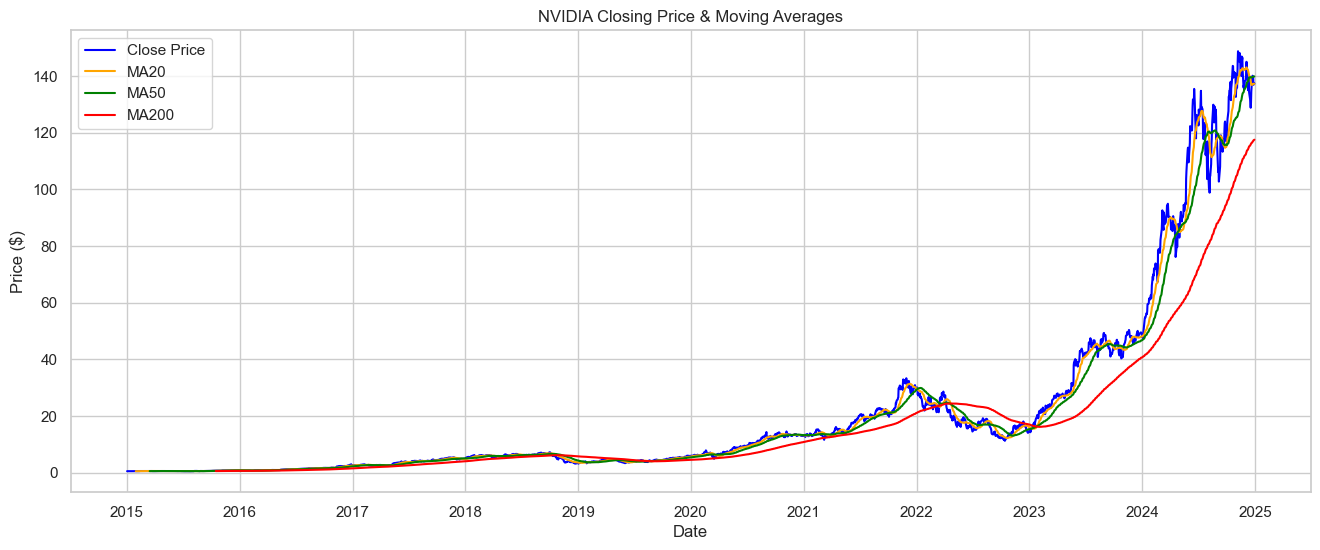

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14,6)

plt.figure(figsize=(16,6))
# GRAPH INTERPRETATION:
# The plot below visualizes the Price Trends along with Moving Averages.
# The Close Price shows the actual market value.
# SMA lines (20, 50, 200) help identify the prevailing trend direction.
# Crossovers between Short-term (MA20) and Long-term (MA200) often signal trend reversals (Golden Cross / Death Cross).
plt.plot(nvda_data['Date'], nvda_data['Close_NVDA'], label='Close Price', color='blue')
plt.plot(nvda_data['Date'], nvda_data['MA20'], label='MA20', color='orange')
plt.plot(nvda_data['Date'], nvda_data['MA50'], label='MA50', color='green')
plt.plot(nvda_data['Date'], nvda_data['MA200'], label='MA200', color='red')
plt.title("NVIDIA Closing Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

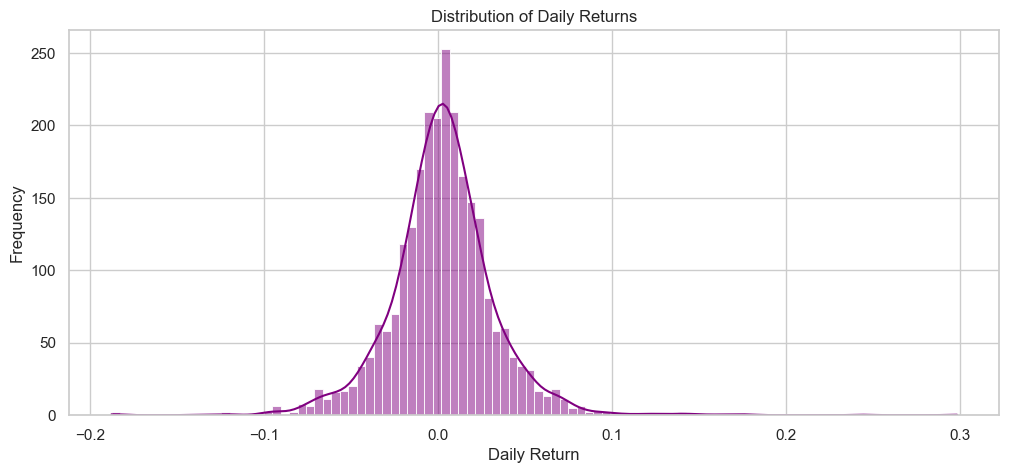

In [83]:
# Plot Distribution of Daily Returns
# This histogram shows how often different daily return values occur.
# It helps visualize stock performance fluctuations and identify periods of high or low volatility.
# The KDE curve highlights the overall distribution trend of daily returns.
plt.figure(figsize=(12,5))
sns.histplot(nvda_data['Daily_Return'], bins=100, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


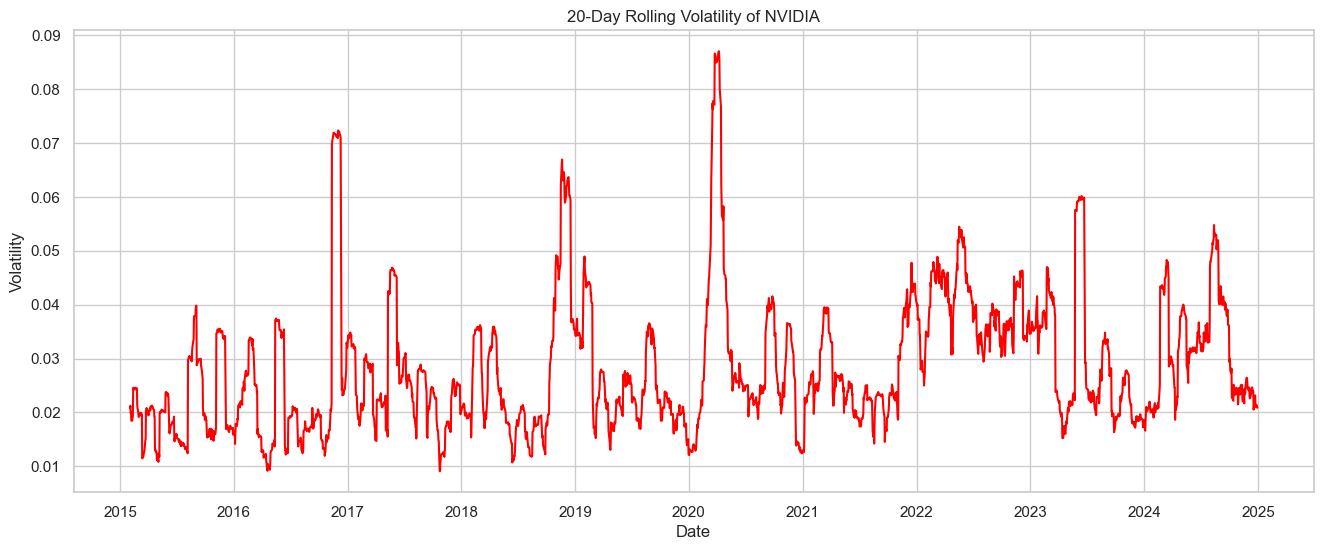

In [84]:

# GRAPH INTERPRETATION
# Volatility measures the dispersion of returns.
# Peaks in the red line below indicate periods of high market uncertainty and risk.
# This is crucial for risk management and modifying trading strategies during turbulent times.
plt.figure(figsize=(16,6))
plt.plot(nvda_data['Date'], nvda_data['Volatility'], color='red')
plt.title("20-Day Rolling Volatility of NVIDIA")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

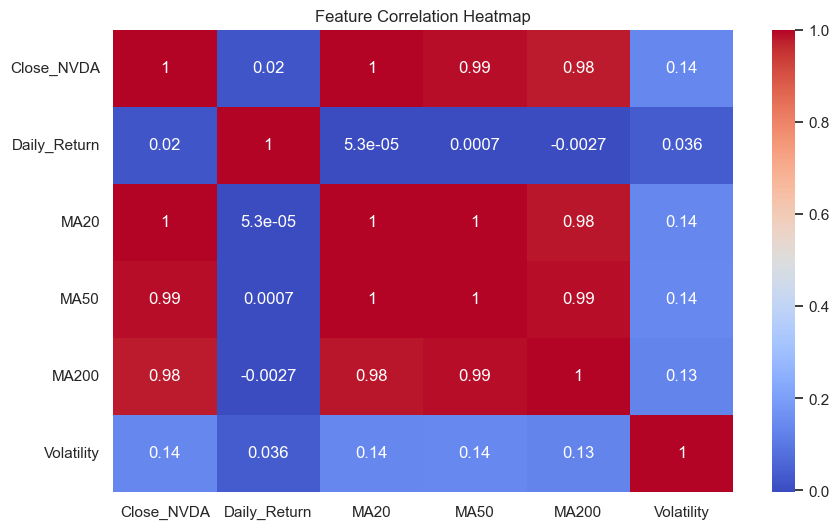

In [85]:
# Plot Feature Correlation Heatmap
# This heatmap visualizes the correlation between key features like closing price,
# daily returns, moving averages, and volatility.
# Strong correlations indicate how features are related and help guide feature selection
# for modeling and understanding multicollinearity.
plt.figure(figsize=(10,6))
sns.heatmap(nvda_data[['Close_NVDA', 'Daily_Return', 'MA20', 'MA50', 'MA200', 'Volatility']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Modeling & Prediction
In this section, we prepare features and target for predicting NVIDIA's next-day trading volume.
Lag features, rolling averages, percentage changes, and price range are created to capture trends and volatility.
The dataset is split chronologically into training and testing sets, preserving time-series order,
and TimeSeriesSplit is used for cross-validation to evaluate model performance on future unseen data.
Three regression models are implemented: Decision Tree simple non-linear patterns,
Random Forest ensemble method to reduce overfitting, and XGBoost gradient boosting for complex pattern learning.


In [86]:
#  Import Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [87]:
# Lag features
# Lagged values of volume and closing price are created to capture temporal dependencies.
# These features represent how previous days' trading activity affects the current day.
nvda_data['Volume_Lag_1'] = nvda_data['Volume_NVDA'].shift(1)
nvda_data['Volume_Lag_2'] = nvda_data['Volume_NVDA'].shift(2)
nvda_data['Close_Lag_1']  = nvda_data['Close_NVDA'].shift(1)


In [88]:
# Rolling averages
# Short-term moving averages of volume are calculated to smooth fluctuations
# and highlight underlying trends over 3-day and 5-day windows.
nvda_data['Vol_MA_3'] = nvda_data['Volume_NVDA'].rolling(3).mean()
nvda_data['Vol_MA_5'] = nvda_data['Volume_NVDA'].rolling(5).mean()


In [89]:
# Percentage changes
# Compute day-to-day relative changes in volume and closing price.
# These features capture short-term momentum and volatility.
nvda_data['Vol_Change'] = nvda_data['Volume_NVDA'].pct_change()
nvda_data['Close_Change'] = nvda_data['Close_NVDA'].pct_change()


In [90]:
# Price range
# Calculates daily range (High - Low) to capture daily price volatility.
nvda_data['Price_Range'] = nvda_data['High_NVDA'] - nvda_data['Low_NVDA']


In [91]:
# Drop NaNs
# Any rows with missing values (due to lag or rolling calculations) are removed.
# Reset index for clean dataset structure.
nvda_data = nvda_data.dropna().reset_index(drop=True)


In [92]:
# Features & target selection
# X contains selected input features that represent market behavior.
# y is the target variable: the next-day trading volume.
features = [
    'Open_NVDA', 'High_NVDA', 'Low_NVDA', 'Close_NVDA',
    'Volume_Lag_1', 'Volume_Lag_2', 'Close_Lag_1',
    'Vol_MA_3', 'Vol_MA_5', 'Vol_Change', 'Close_Change', 'Price_Range'
]
X = nvda_data[features]
y = nvda_data['Volume_NVDA']


In [93]:
# Train-Test Split
# The dataset is split chronologically: first 80% for training, last 20% for testing.
# This preserves the time-series order and prevents data leakage.
split_index = int(len(X) * 0.8)
X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


In [94]:
# Last row for next-day prediction
# Stores the most recent day’s features to predict the next day’s volume.
last_row = X.iloc[-1].values.reshape(1, -1)


In [95]:
# Time-Series Cross-Validation
# TimeSeriesSplit is used to validate models while respecting temporal order.
# This provides a realistic evaluation of model performance on future unseen data.
tscv = TimeSeriesSplit(n_splits=5)


## Decision Tree Regressor
In this section, we train a Decision Tree model to predict next day NVIDIA trading volume.
The model captures non linear relationships in historical features such as price, volume, and trends.
Performance is evaluated using MSE, MAE, and R² metrics, and the model is used to forecast the next day volume.




In [96]:
# Initialize and train the Decision Tree model
# max_depth limits tree depth to prevent overfitting, min_samples_leaf ensures minimum samples per leaf
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, random_state=42)
dt_model.fit(X_train, y_train)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_lea

In [97]:
# Predict on test set and next day
# y_pred_dt contains predictions for the test set
# next_day_dt predicts the trading volume for the most recent day
y_pred_dt = dt_model.predict(X_test)
next_day_dt = dt_model.predict(last_row)


c:\Users\Muneeb\Downloads\NVIDIA dataset work\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [98]:
# Evaluate model performance
# Metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score
# These provide insight into accuracy and how well the model explains the variance in the target
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt  = r2_score(y_test, y_pred_dt)


In [99]:
# Display metrics and next-day prediction
print("\nDecision Tree Metrics:")
print("MSE:", mse_dt, "MAE:", mae_dt, "R²:", r2_dt)
print("Next-Day Predicted Volume:", next_day_dt[0])



Decision Tree Metrics:
MSE: 5538890512681626.0 MAE: 46082730.43854874 R²: 0.8055831919809648
Next-Day Predicted Volume: 213812711.53846154


The R² score shows how much of the overall volume pattern the model correctly predicted.
Example: R² = 0.81 means the model captured 80
% of the trend and variation correctly.
The remaining 19% is due to unpredictable market fluctuations.
This means the model gives a general idea of the trend, but the exact number can vary day to day.

## Random Forest Regressor


This model uses an ensemble of decision trees to predict next day NVIDIA trading volume.
By averaging multiple trees, it reduces overfitting and improves generalization.
Performance is evaluated using MSE, MAE, and R² metrics, and the model forecasts the next day volume.


In [100]:
# Initialize and train the Random Forest model
# n_estimators = 300 trees, max_depth limits tree depth, min_samples_leaf ensures minimum samples per leaf
# n_jobs=-1 uses all CPU cores for faster training
rf_model = RandomForestRegressor(n_estimators=300, max_depth=8, min_samples_leaf=20,
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [101]:
# Predict on test set and next day
# y_pred_rf contains predictions for the test set
# next_day_rf predicts the trading volume for the most recent day
y_pred_rf = rf_model.predict(X_test)
next_day_rf = rf_model.predict(last_row)


c:\Users\Muneeb\Downloads\NVIDIA dataset work\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [102]:
# Evaluate model performance
# Metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score
# These indicate model accuracy and how well it explains variance in the target
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf  = r2_score(y_test, y_pred_rf)


In [103]:
# Display metrics and next-day prediction
print("\nRandom Forest Metrics:")
print("MSE:", mse_rf, "MAE:", mae_rf, "R²:", r2_rf)
print("Next-Day Predicted Volume:", next_day_rf[0])



Random Forest Metrics:
MSE: 1647126452445395.8 MAE: 22991271.990938377 R²: 0.9421853408087835
Next-Day Predicted Volume: 187516336.65111193


Random Forest

The R² score shows how much of the overall volume pattern the model correctly predicted.
Example: R² = 0.94 means the model captured 94% of the trend and variation correctly.
The remaining 6% is due to unpredictable market fluctuations.
This means the model gives a very good estimate of the trend and next-day volume.

## XGBoost Regressor
XGBoost is a gradient boosting model that combines weak learners sequentially to predict next day NVIDIA trading volume.
It handles complex patterns in the data, reduces bias, and improves prediction accuracy.
Model performance is evaluated using MSE, MAE, and R², and it is also used to forecast the next day volume.


In [104]:
# Initialize and train the XGBoost model
# n_estimators = 300 trees, max_depth limits tree depth, learning_rate controls step size
# subsample and colsample_bytree control randomness to reduce overfitting
xgb_model = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.05,
                         subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [105]:
# Predict on test set and next day
# y_pred_xgb contains predictions for the test set
# next_day_xgb predicts the trading volume for the most recent day
y_pred_xgb = xgb_model.predict(X_test)
next_day_xgb = xgb_model.predict(last_row)


In [106]:
# Evaluate model performance
# Metrics include Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score
# These indicate model accuracy and how well it explains variance in the target
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb  = r2_score(y_test, y_pred_xgb)


In [107]:
# Display metrics and next-day prediction
print("\nXGBoost Metrics:")
print("MSE:", mse_xgb, "MAE:", mae_xgb, "R²:", r2_xgb)
print("Next-Day Predicted Volume:", next_day_xgb[0])



XGBoost Metrics:
MSE: 218909936451584.0 MAE: 9982396.0 R²: 0.9923161864280701
Next-Day Predicted Volume: 1.682318e+08


XGBoost

The R² score shows how much of the overall volume pattern the model correctly predicted.
Example: R² = 0.99 means the model captured 99% of the trend and variation correctly.
Only 1% difference is due to unpredictable market fluctuations.
This means the model gives a very precise estimate of the trend and next-day volume.

# Outcome

## Compare Actual vs Predicted
This visualization compares the true NVIDIA trading volume with predictions from all three models.
It helps evaluate how closely each model follows real market behavior over time.
Clear color separation allows easy comparison of model performance and trend alignment.

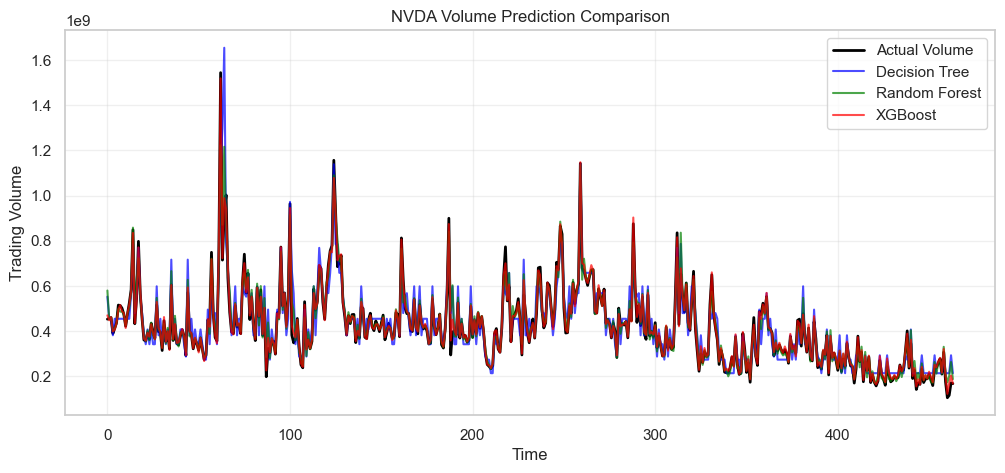

In [108]:
plt.figure(figsize=(12,5))

# Plot actual trading volume
plt.plot(y_test.values, label='Actual Volume', color='black', linewidth=2)

# Plot Decision Tree predictions
plt.plot(y_pred_dt, label='Decision Tree', color='blue', alpha=0.7)

# Plot Random Forest predictions
plt.plot(y_pred_rf, label='Random Forest', color='green', alpha=0.7)

# Plot XGBoost predictions
plt.plot(y_pred_xgb, label='XGBoost', color='red', alpha=0.7)

# Chart formatting
plt.title("NVDA Volume Prediction Comparison")
plt.xlabel("Time")
plt.ylabel("Trading Volume")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

